# 一、多项式回归

In [2]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

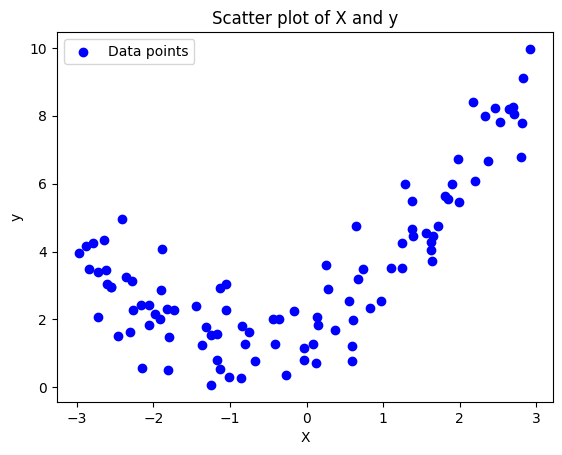

In [13]:
# 构造数据X，y
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# 绘制散点图
plt.scatter(X, y, color='blue', label='Data points')
plt.title("Scatter plot of X and y")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [31]:
# 转换特征,  degree为自由度degree=2 表示生成二次多项式特征。这段代码会将输入数据 X 转换为其平方和交叉项，以便进行多项式回归。
poly=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly.fit_transform(X)
print("转换前的特征为：",X[0])
print("转换后的特征为：",X_poly[0])
# 模型训练, 转换后的多项式特征可以被线性回归模型拟合。
lin_reg=LinearRegression().fit(X_poly,y)
print("模型1次项和2次项的系数为：",lin_reg.coef_)
print("模型常数项为：",lin_reg.intercept_)

转换前的特征为： [-0.75275929]
转换后的特征为： [-0.75275929  0.56664654]
模型1次项和2次项的系数为： [[0.93366893 0.56456263]]
模型常数项为： [1.78134581]


###### PolynomialFeatures 是来自 Scikit-Learn 的一个预处理模块，用于生成一个新的特征矩阵，其中包含所有多达指定度数的多项式组合。
###### fit_transform 首先学习数据的转换规则（fit），然后将这些规则应用到数据上（transform），从而输出扩展后的特征矩阵 X_poly。

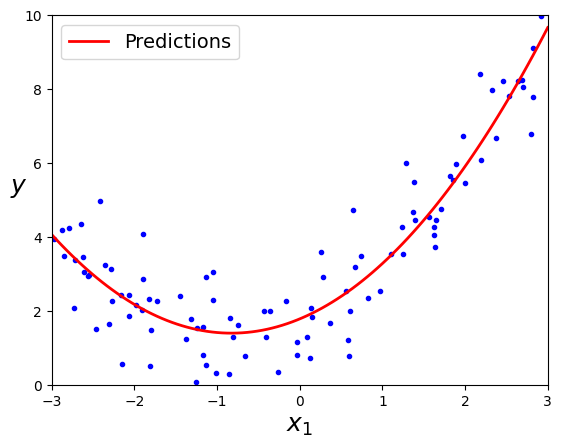

In [33]:
#模型预测
X_test=np.linspace(-3, 3, 100).reshape(100, 1)#生成测试集
X_test_poly=poly.fit_transform(X_test)
y_pre=lin_reg.predict(X_test_poly)
# 可视化结果
plt.plot(X, y, "b.")
plt.plot(X_test, y_pre, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

###### np.linspace(-3, 3, 100).reshape(100, 1) 使用 numpy 的 linspace 函数生成了一个从 -3 到 3 均匀分布的 100 个点，这些点用作测试数据，目的是评估模型在这个区间内的预测表现。
###### poly_features.transform(X_test)：使用之前定义的 poly_features 对象（已经配置为生成二次多项式特征）来转换测试数据 X_test。这确保了测试数据与训练数据具有相同的特征转换，使其适用于预测。
######  lin_reg.predict(X_test_poly)：使用训练好的线性回归模型 lin_reg 来预测转换后的测试数据 X_test_poly 的输出。得到的 y_pre 是模型对测试数据的预测值。

# 二、线性回归模型的正则化方法

### 正则化项的引入使模型的参数趋向于较小的值，防止模型复杂度过高。

## 2.1 岭回归

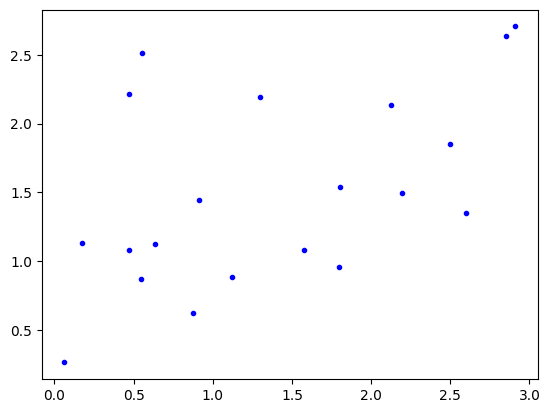

In [34]:
# 导入numpy
import matplotlib.pyplot as plt
import numpy as np
# 构造数据
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
plt.plot(X, y, "b.")

### 方法1：用Ridge计算方程解

#导入库
from sklearn.linear_model import Ridge

#模型训练

ridge_reg = Ridge(alpha=1.0,  solver='auto', random_state=None)

* alpha : 正则化强度。取值非负数。较小的 alpha 值会使模型更复杂，可能导致过拟合；较大的 alpha 值则会使模型更简单，可能导致欠拟合

* solver ({'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'}, optional): 用于计算岭回归的算法。

#利用ridge_reg.fit()学习训练集的规律

#利用ridge_reg.predict()模型预测x=1.5时的值

In [2]:
import numpy as np
from sklearn.linear_model import Ridge
# 构造数据
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
# 模型训练
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) #alpha是正则化强度，Cholesky 法进行矩阵分解，求闭式解
ridge_reg.fit(X, y)
# 模型预测
ridge_reg.predict([[1.5]])

array([[1.55071465]])

### 方法2：随机梯度下降法的正则化

from sklearn.linear_model import SGDRegressor

#模型训练

sgd_reg = SGDRegressor(penalty='l2',  alpha=0.0001,  max_iter=1000,     tol=0.001,     random_state=None)
* penalty: 正则化项使用："l2"
* alpha: 正则化项的强度
* max_iter: 迭代的最大次数
* tol: 迭代停止的阈值。
* random_state: 每次运行结果将是可重复的


In [44]:
import numpy as np
from sklearn.linear_model import SGDRegressor
# 构造数据
np.random.seed(42)
m = 20
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 1.5
# 模型训练：l2是惩罚，还有l1，一般是用l2
sgd_reg=SGDRegressor(penalty='l2',alpha=1e-4,max_iter=1000,tol=1e-6,random_state=None).fit(X,y)
#模型预测
sgd_reg.predict([[1.5]])

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.54936531])

### 加分项：简述“方法1：用Ridge计算方程解”和“方法2：随机梯度下降法”这两个方法的区别与联系

In [ ]:
# 在此处回复


## 2.2 Lasso 回归

### 方法1：sklearn.linear_model中的Lasso类

from sklearn.linear_model import Lasso

#模型训练

lasso_reg = Lasso(alpha = 0.1)

#利用lasso_reg.fit()学习训练集的规律

#利用lasso_reg.predict()模型预测x=1.5时的值


In [53]:
from sklearn.linear_model import Lasso
import numpy as np
# 构造数据
np.random.seed(42)
m = 20
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 1.5
#模型训练，套索回归
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x, y)
# 模型预测
lasso_reg.predict([[1.5]])

array([1.53788174])

### 方法2：使用随机梯度下降法：SGDRegressor

from sklearn.linear_model import SGDRegressor

#模型训练

sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l1", random_state=42)

#利用sgd_reg.fit()学习训练集的规律

#利用sgd_reg.predict()模型预测x=1.5时的值


In [52]:
from sklearn.linear_model import SGDRegressor
import numpy as np
# 构造数据
np.random.seed(42)
m = 20
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 1.5
#模型训练
sgd_reg=SGDRegressor(penalty='l1',alpha=1e-4,max_iter=1000,tol=1e-6,random_state=None).fit(x,y)
# 模型预测
sgd_reg.predict([[1.5]])

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.54935434])

## 2.3 弹性网络

from sklearn.linear_model import ElasticNet

#模型训练

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

* alpha：正则化强度

* l1_ratio：混合率 r，r=0时，弹性网络就是 Ridge 回归，当r=1 时，其就是 Lasso 回归。



In [54]:
#导入ElasticNet
from sklearn.linear_model import ElasticNet
import numpy as np
# 构造数据
np.random.seed(42)
m = 20
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 1.5

#模型训练
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.4,random_state=42,max_iter=1000).fit(x,y)
# 模型预测
elastic_net.predict([[1.5]])

array([1.54434721])

## 作业 
请构造一组数据，

m = 20

X = 3 * np.random.rand(m, 1)

y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

并利用分别用岭回归、lasso回归、弹性网络三中方法预测x=1.5的y值，要求输出预测值，提交HTML格式文档

In [133]:
# 请在此处作答
m = 20
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 1.5

#岭回归用l2
sgd_reg=SGDRegressor(penalty='l2',alpha=1e-4,max_iter=1000,tol=1e-6,random_state=None).fit(x,y)
print(sgd_reg.predict([[1.5]]))

#lasso回归用l1
sgd_reg=SGDRegressor(penalty='l1',alpha=1e-4,max_iter=1000,tol=1e-6,random_state=None).fit(x,y)
print(sgd_reg.predict([[1.5]]))

#弹性网络用Elasticnet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.4,random_state=42,max_iter=1000).fit(x,y)
print(elastic_net.predict([[1.5]]))

[1.68288563]
[1.683883]
[1.68066887]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
